# Lab Assignment One - Exploring Table Data

**Business Understanding (1.5 points total)**

- **In your own words, give an overview of the dataset.**
    - The Census Income dataset includes 48,842 records with 14 features. It contains both categorical and continuous variables. It is targeted at individuals over 16 with an adjusted gross income over 100 and working hours, this dataset also contains missing values. The data focuses on a subset of the population most relevant for the study of income levels.
- **Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?).**
    - I seleceted this dataset because I am interested in Socio-economic Analysis. Given this dataset provides a rich source of socio-economic information, it is ideal for examining income distribution and factors influencing economic status.
    - The data focuses on a subset of the population most relevant for the study of income levels.
- **What is the prediction task for your data and why are other third parties interested in the result**
    - This dataset was collected to analyze and predict the income level of individuals based on various demographic and employment factors. The primary prediction task is to determine whether an individual earns more than $50,000 per year. Third parties, including government agencies, policymakers, and businesses, are interested in this dataset for shaping welfare programs, tax policies, studying market trends, and consumer behavior
- **Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties? Be specific and use your own words to describe the aspects of the data.**
    - For this prediction algorithm to be useful to third parties, it needs to achieve a high level of accuracy in classifying individuals into the correct income categories. Specific metrics such as precision, recall, and F1-score should be considered. Also, model interpretability can add value for third parties seeking to understand the underlying factors influencing income levels.

**Data Understanding (3 points total)**

- **[1.5 points]**
    - **Load the dataset and appropriately define data types.**
        - `Integer` — for numerical values
        - `Categorical` — for data representing categories or groups
        - `Binary` — for the target variable “income”
    - **Discuss the attributes collected in the dataset / What data type should be used to represent each data attribute?**
        1. **Age**
            - Description: Years since birth
            - Data Type: Integer
        2. **Workclass**
            - Description: Classification of employment sector - includes Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
            - Data Type: Categorical
        3. **Final Weight (fnlwgt)**
            - Description: Weight assigned by the Census Bureau, reflecting the number of people the observation represents.
            - Data Type: Integer
        4. **Education**
            - Description: Highest level of education achieved - includes Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
            - Data Type: Categorical
        5. **Education Number (education-num)**
            - Description: Number of years of education completed.
            - Data Type: Integer
        6. **Marital Status**
            - Description: Marital status of the individual - includes Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
            - Data Type: Categorical
        7. **Occupation**
            - Description: Type of occupation - includes Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
            - Data Type: Categorical
        8. **Relationship**
            - Description: Role of the individual within a family - includes Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
            - Data Type: Categorical
        9. **Race**
            - Description: Race of the individual - includes White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
            - Data Type: Categorical
        10. **Sex**
            - Description: Biological sex of the individual - Female or Male.
            - Data Type: Binary
        11. **Capital Gain**
            - Description: Income from investment sources, apart from wages/salary.
            - Data Type: Integer
        12. **Capital Loss**
            - Description: Losses from investment sources.
            - Data Type: Integer
        13. **Hours per Week**
            - Description: Number of hours worked per week.
            - Data Type: Integer
        14. **Native Country**
            - Description: Country of origin of the individual - includes United-States, Cambodia, England, Puerto-Rico, etc.
            - Data Type: Categorical
        15. **Income**
            - Description: Indicates if income exceeds $50K/year - categories are >50K and <=50K.
            - Data Type: Binary
- **[1.5 points]**
    - **Verify data quality:**
    - **Explain any missing values or duplicate data.**
        - Using the “print(census_income.variables)” line of code.
        - I was able to identify, workclass, occupation and native-country as containing missing values in this dataset. Generally, missing values in this dataset feature can occur due to entry errors or refusal to disclose. But specifically, for each —
            - **Workclass**: Missing values may be due to unemployment or informal employment.
            - **Occupation**: Gaps could arise from unemployment, retirement or non-traditional occupations.
            - **Native-country**: Missing data might result from privacy concerns or uncertain origin.
    - **Visualize entries that are missing/complete for different attributes.**
    - **Are those mistakes? Why do these quality issues exist in the data?**
    - **How do you deal with these problems?**
    - **Give justifications for your methods (elimination or imputation).**

- Data Visualization (**4.5 points total**)
    - [**2 points**]
        - Visualize basic feature distributions.
        - That is, plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data.
        - Describe anything meaningful or potentially useful you discover from these visualizations.
        - These may also help to understand what data is missing or needs imputation. **Note**: You can also use data from other sources to bolster visualizations.
        - Visualize at least five plots, at least one categorical.
    - [**2.5 points**]
        - Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions.
        - Use whichever visualization method is appropriate for your data.
        - **Important:** Interpret the implications for each visualization.

- **Exceptional Work (1 point total)**
  - **[0.4 points]**
    - The overall quality of the report as a coherent, useful, and polished product will be reflected here.
    - Criteria:
      - Does it make sense overall?
      - Do your visualizations answer the questions you put forth in your business analysis?
      - Do you properly and consistently cite sources and annotate changes made to base code?
      - Do you provide specific reasons for your assumptions?
      - Do subsequent questions follow naturally from initial exploration?

    - **[0.6 Points] Additional analysis:**
      - **5000 level students**: 
        - You have free rein to provide any additional analyses.
      - **7000 level students**: 
        - Implement dimensionality reduction using uniform manifold approximation and projection (UMAP), then visualize and interpret the results.
      - Explanation of UMAP dimensionality reduction methods:
        - You may be interested in the following information:
          - [UMAP on GitHub](https://github.com/lmcinnes/umap)
          - [Understanding UMAP](https://pair-code.github.io/understanding-umap/)


In [1]:
import sys
import copy
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import sklearn  # <-- Import scikit-learn module
import warnings

print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Missingno version: {msno.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")  # <-- Print scikit-learn version

Python version: 3.11.7 (main, Dec 15 2023, 12:09:56) [Clang 14.0.6 ]
Pandas version: 2.1.4
NumPy version: 1.26.3
Matplotlib version: 3.8.0
Seaborn version: 0.12.2
Missingno version: 0.4.2
Scikit-learn version: 1.2.2


In [2]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# import dataset
census_income = fetch_ucirepo(id=20)

# access data
X = census_income.data.features
y = census_income.data.targets

# access metadata
print(census_income.metadata.uci_id)
print()
print(census_income.metadata.num_instances)
print()
print(census_income.metadata.additional_info.summary)

# access variable info in tabular format
print(census_income.variables)

20

48842

Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.
              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer     

In [3]:
df = pd.DataFrame(X, columns=census_income.feature_names)
df['income'] = y
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Summary statistics
I chose to run summary statistics on the features most important to my goal. Given that my goal is to predict whether an individual earns over or under 50k, a categorical variable, I focused on age, workclass, and occupation.

In [5]:
# Frequency
frequency_age = df['age'].value_counts()
frequency_workclass = df['workclass'].value_counts()
frequency_occupation = df['occupation'].value_counts()

print("Frequency of age:")
print(frequency_age)
print("\nFrequency of Workclass:")
print(frequency_workclass)
print("\nFrequency of occupation:")
print(frequency_occupation)

Frequency of age:
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

Frequency of Workclass:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Frequency of occupation:
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [6]:
# Location
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_Workclass = df['workclass'].mode()[0]
mode_occupation = df['occupation'].mode()[0]

print("\nLocation:")
print(f"Mean age: {mean_age}")
print(f"Median age: {median_age}")
print(f"Mode workclass: {mode_Workclass}")
print(f"Mode occupation: {mode_occupation}")


Location:
Mean age: 38.64358543876172
Median age: 37.0
Mode workclass: Private
Mode occupation: Prof-specialty


In [7]:
# Spread / Dispersion
range_age = df['age'].max() - df['age'].min()

print("\nSpread / Dispersion:")
print(f"Range of age: {range_age}")


Spread / Dispersion:
Range of age: 73


### Missing Data
Now, I want to identify any missing data in my dataset, if present. Handling missing data is a crucial step in data analysis and preprocessing. Ignoring missing data or handling it improperly can lead to biased analysis and inaccurate results.

In [8]:
# Calculate the percentage of missing values for each feature
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Print only if a column has missing data
for column, percentage in missing_percentage.items():
    if percentage > 0:
        print(f"Column '{column}' has {percentage:.2f}% missing values.")

Column 'workclass' has 1.97% missing values.
Column 'occupation' has 1.98% missing values.
Column 'native-country' has 0.56% missing values.


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

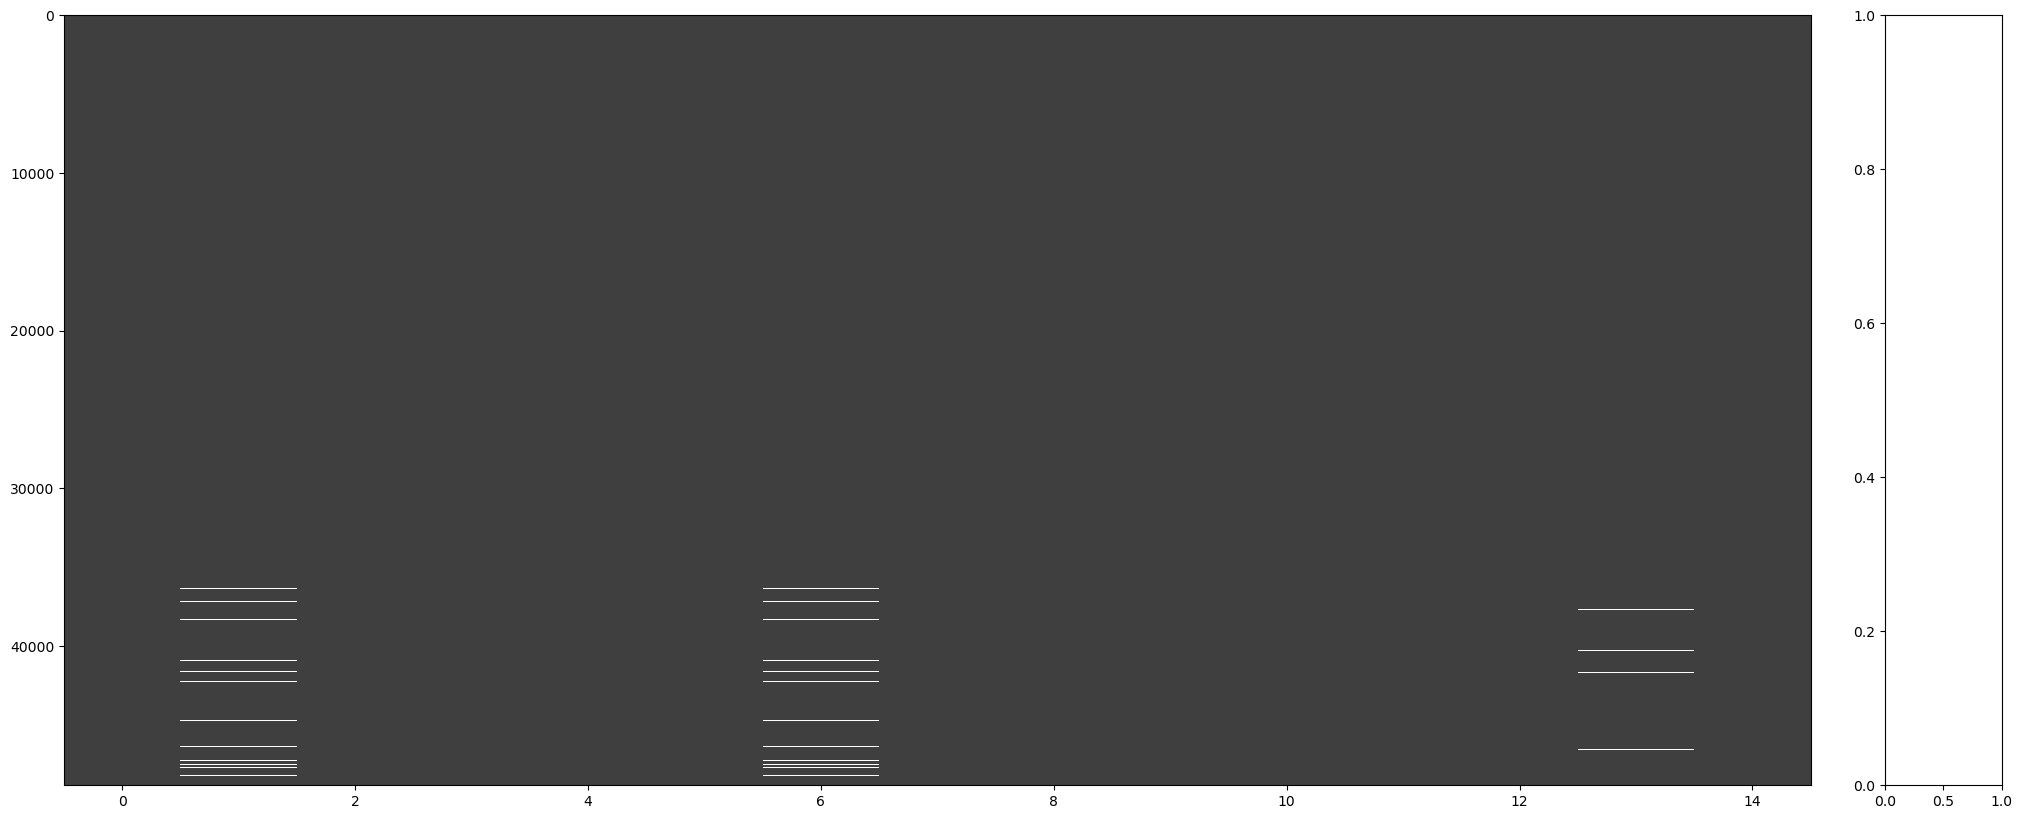

In [9]:
msno.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
msno.matrix(df.sort_values(by=["Age","Age"]))
plt.title("Sorted",fontsize=22)
plt.show()

Since we are missing data for three features, we will have to make the decision to either, impute or eliminate data. 

Considering first imputation, we could potentially use simple imputation techniques such as replacing missing values with the most frequent category (mode) or a specific category like 'Other' if appropriate. 
- To determine if this approach would be advantageous, we need to better understand the following -
    - Understand if imputing with the most frequent category will introduce bias. (overrepresented in the dataset)
    - Understand if replacing missing values with 'Other' will cause a lost of pattern identification. (groups all missing values together)

In [10]:
missing_rows = df[df['workclass'].isna() | df['occupation'].isna() | df['native-country'].isna()]

missing_distribution = {
    'workclass': missing_rows['workclass'].value_counts(normalize=True),
    'occupation': missing_rows['occupation'].value_counts(normalize=True),
    'native-country': missing_rows['native-country'].value_counts(normalize=True)
}

for column, distribution in missing_distribution.items():
    print(f"Distribution of categories in missing values of '{column}':")
    print(distribution)
    print()

Distribution of categories in missing values of 'workclass':
workclass
Private             0.732558
Self-emp-not-inc    0.093023
State-gov           0.062016
Local-gov           0.038760
Federal-gov         0.034884
Self-emp-inc        0.027132
Never-worked        0.011628
Name: proportion, dtype: float64

Distribution of categories in missing values of 'occupation':
occupation
Prof-specialty       0.243137
Other-service        0.125490
Sales                0.117647
Exec-managerial      0.109804
Craft-repair         0.090196
Adm-clerical         0.086275
Machine-op-inspct    0.062745
Transport-moving     0.054902
Tech-support         0.039216
Handlers-cleaners    0.023529
Farming-fishing      0.019608
Priv-house-serv      0.015686
Protective-serv      0.007843
Armed-Forces         0.003922
Name: proportion, dtype: float64

Distribution of categories in missing values of 'native-country':
native-country
United-States                 0.922914
Mexico                        0.015839
South 

In [11]:
missing_rows = df[df['workclass'].isna() | df['occupation'].isna() | df['native-country'].isna()]

missing_distribution = {
    'workclass': missing_rows['workclass'].value_counts(normalize=True),
    'occupation': missing_rows['occupation'].value_counts(normalize=True),
    'native-country': missing_rows['native-country'].value_counts(normalize=True)
}

for column, distribution in missing_distribution.items():
    print(f"Distribution of categories in missing values of '{column}':")
    print(distribution)
    print()

Distribution of categories in missing values of 'workclass':
workclass
Private             0.732558
Self-emp-not-inc    0.093023
State-gov           0.062016
Local-gov           0.038760
Federal-gov         0.034884
Self-emp-inc        0.027132
Never-worked        0.011628
Name: proportion, dtype: float64

Distribution of categories in missing values of 'occupation':
occupation
Prof-specialty       0.243137
Other-service        0.125490
Sales                0.117647
Exec-managerial      0.109804
Craft-repair         0.090196
Adm-clerical         0.086275
Machine-op-inspct    0.062745
Transport-moving     0.054902
Tech-support         0.039216
Handlers-cleaners    0.023529
Farming-fishing      0.019608
Priv-house-serv      0.015686
Protective-serv      0.007843
Armed-Forces         0.003922
Name: proportion, dtype: float64

Distribution of categories in missing values of 'native-country':
native-country
United-States                 0.922914
Mexico                        0.015839
South 

Looking at the results -
- 'Private' comprises of 73.26% of missing values in 'workclass', so will dominate imputed data, skewing subsequent analysis.
- 'Prof-specialty' comprises of 24.31% of missing values in 'occupation', so will dominate imputed data, skewing subsequent analysis.
- 'United-States' comprises of 92.29% of missing values in 'native-country', so will dominate imputed data, skewing subsequent analysis.


To avoid the potentially lost valuable information that could have been inferred from other categories, we will also not replace all missing values with 'Other'. Again, this approach effectively groups all missing values together. Which creates a new pattern in our dataset.

Given this, we could consider advanced imputation strategies, like K-Nearest Neighbors (KNN) for imputation. Which will impute based on category distributions within specific subgroups, to mitigate bias.

Given this, we could consider advanced imputation strategy, like K-Nearest Neighbors (KNN) for imputation. The benefits of KNN are -
- KNN will preserve multivariate relationships
- KNN will not make assumptions about the underlying distribution of the data
- KNN can handle categorical data (workclass, occupation, and native-country are all categorical)

Now, we just need to determine a K value. A common appoarch is to set K to be the square root of the number of rows in the dataset.

In [12]:
k = int(len(df) ** 0.5)
print(f'k = {k}')

k = 221


In [13]:
features_to_use = ['workclass', 'occupation','native-country']
temp = df[features_to_use].to_numpy()

Since the KNNImputer impute missing values using a distance-based algorithm, the features to impute need to be numerical input data.

To solve this, we can preprocess own categorical data before applying the KNNImputer. In class we learned about one hot encoding, which has the following benefit -

- One-hot encoding avoids unintended biases by representing each category independently.

In [14]:
encoder = OneHotEncoder()
temp_encoded = encoder.fit_transform(temp)
temp_dense = temp_encoded.toarray()

In [15]:
knn_obj = KNNImputer(n_neighbors=k)
knn_obj.fit(temp_dense)
temp_imputed = knn_obj.transform(temp_dense)

In [16]:
imputed_df = pd.DataFrame(temp_imputed, columns=encoder.get_feature_names_out(features_to_use))

In [17]:
df_imputed = copy.deepcopy(df)

In [18]:
for feature in features_to_use:
    for col in imputed_df.columns:
        if col.startswith(feature):
            df_imputed[col] = imputed_df[col]

In [19]:
df_imputed.dropna(inplace=True)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 84 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        47621 non-null  int64  
 1   workclass                                  47621 non-null  object 
 2   fnlwgt                                     47621 non-null  int64  
 3   education                                  47621 non-null  object 
 4   education-num                              47621 non-null  int64  
 5   marital-status                             47621 non-null  object 
 6   occupation                                 47621 non-null  object 
 7   relationship                               47621 non-null  object 
 8   race                                       47621 non-null  object 
 9   sex                                        47621 non-null  object 
 10  capital-gain               

In [20]:
print(knn_obj.n_features_in_)

69


To better understand the distribution of the imputed data, we can first use a histogram. Which is simple graphical tool to visualize how the imputation process has influenced the overall distribution of the data. Now, we can verify if the imputation method has maintained the inherent characteristics of the original dataset.

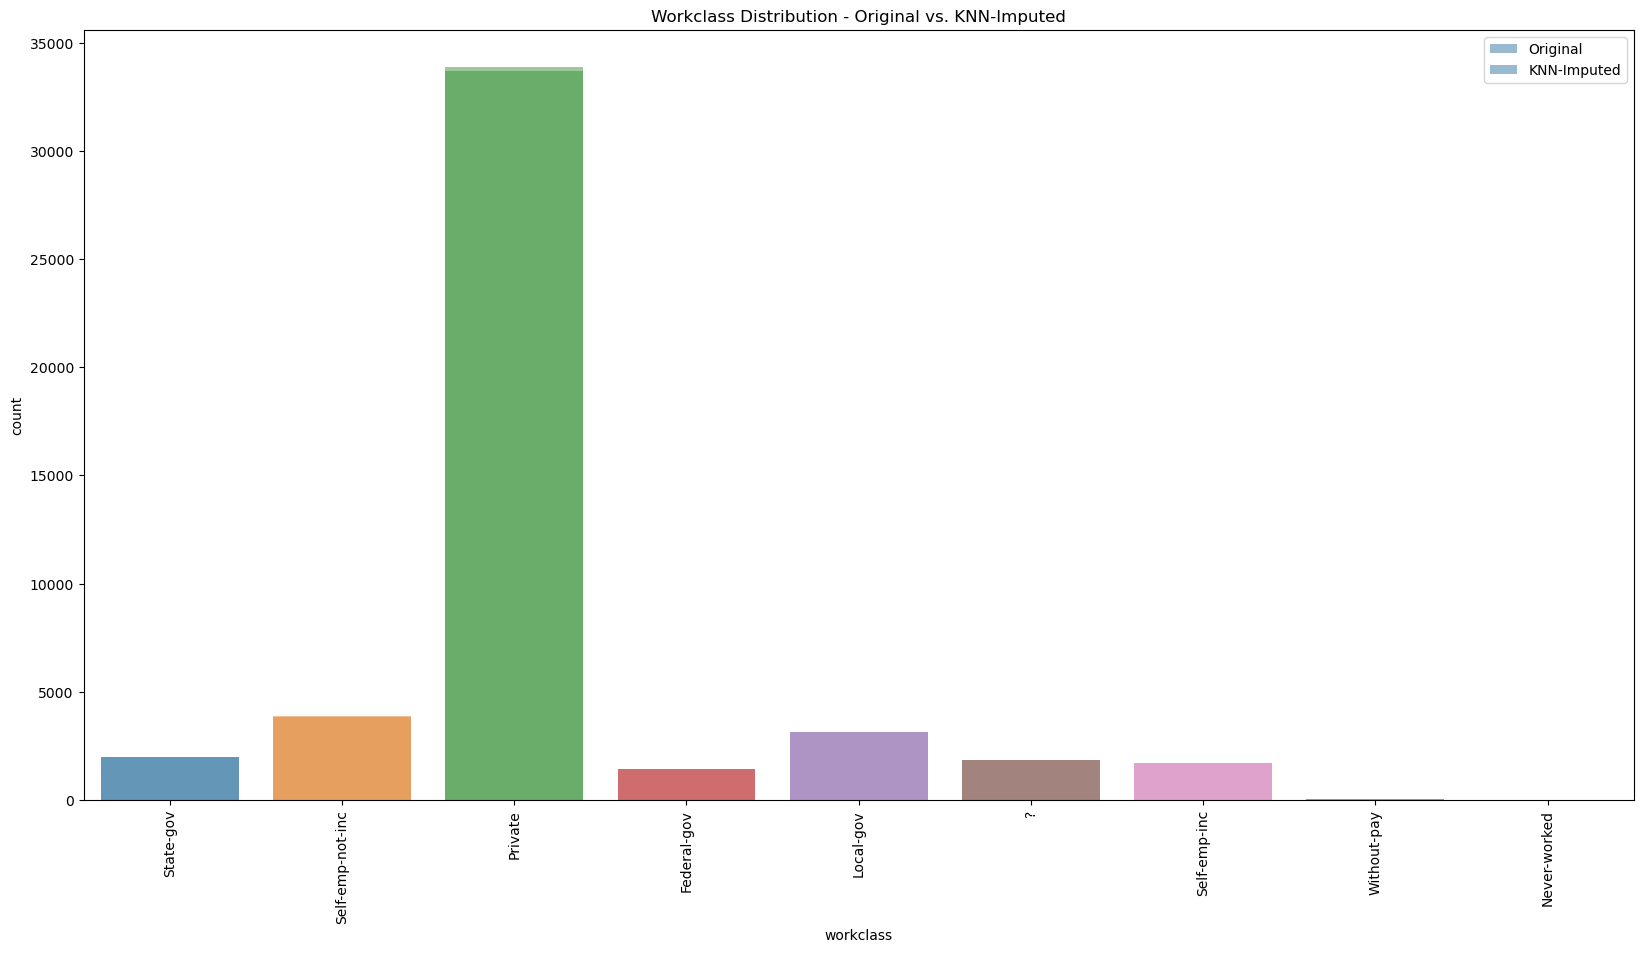

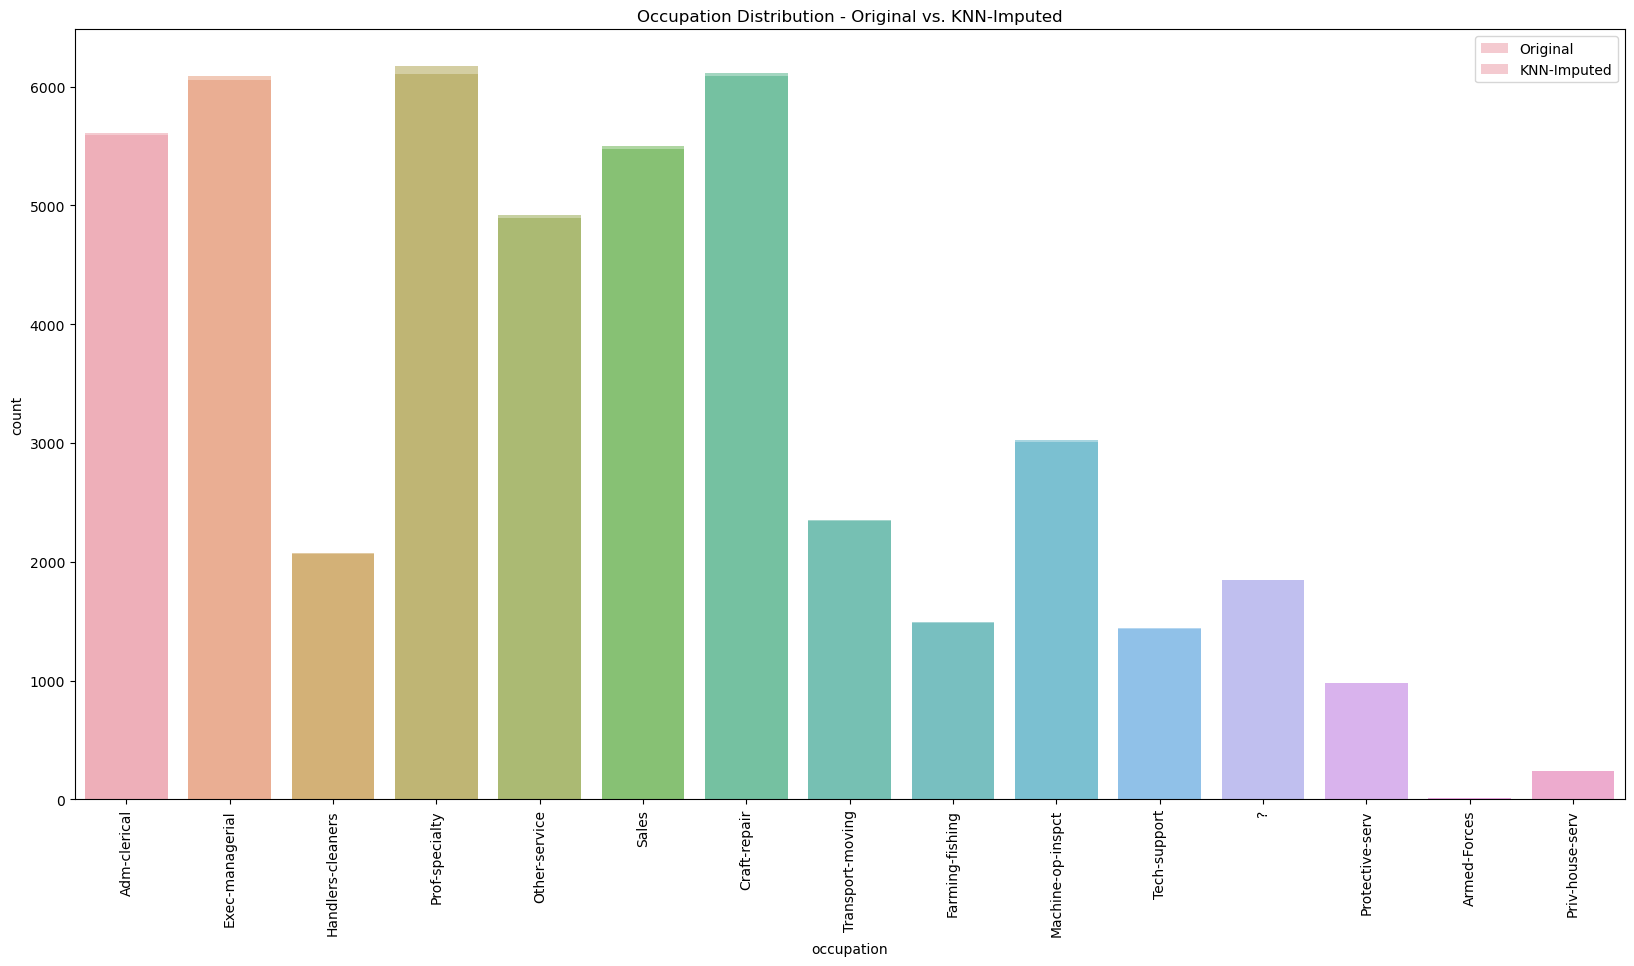

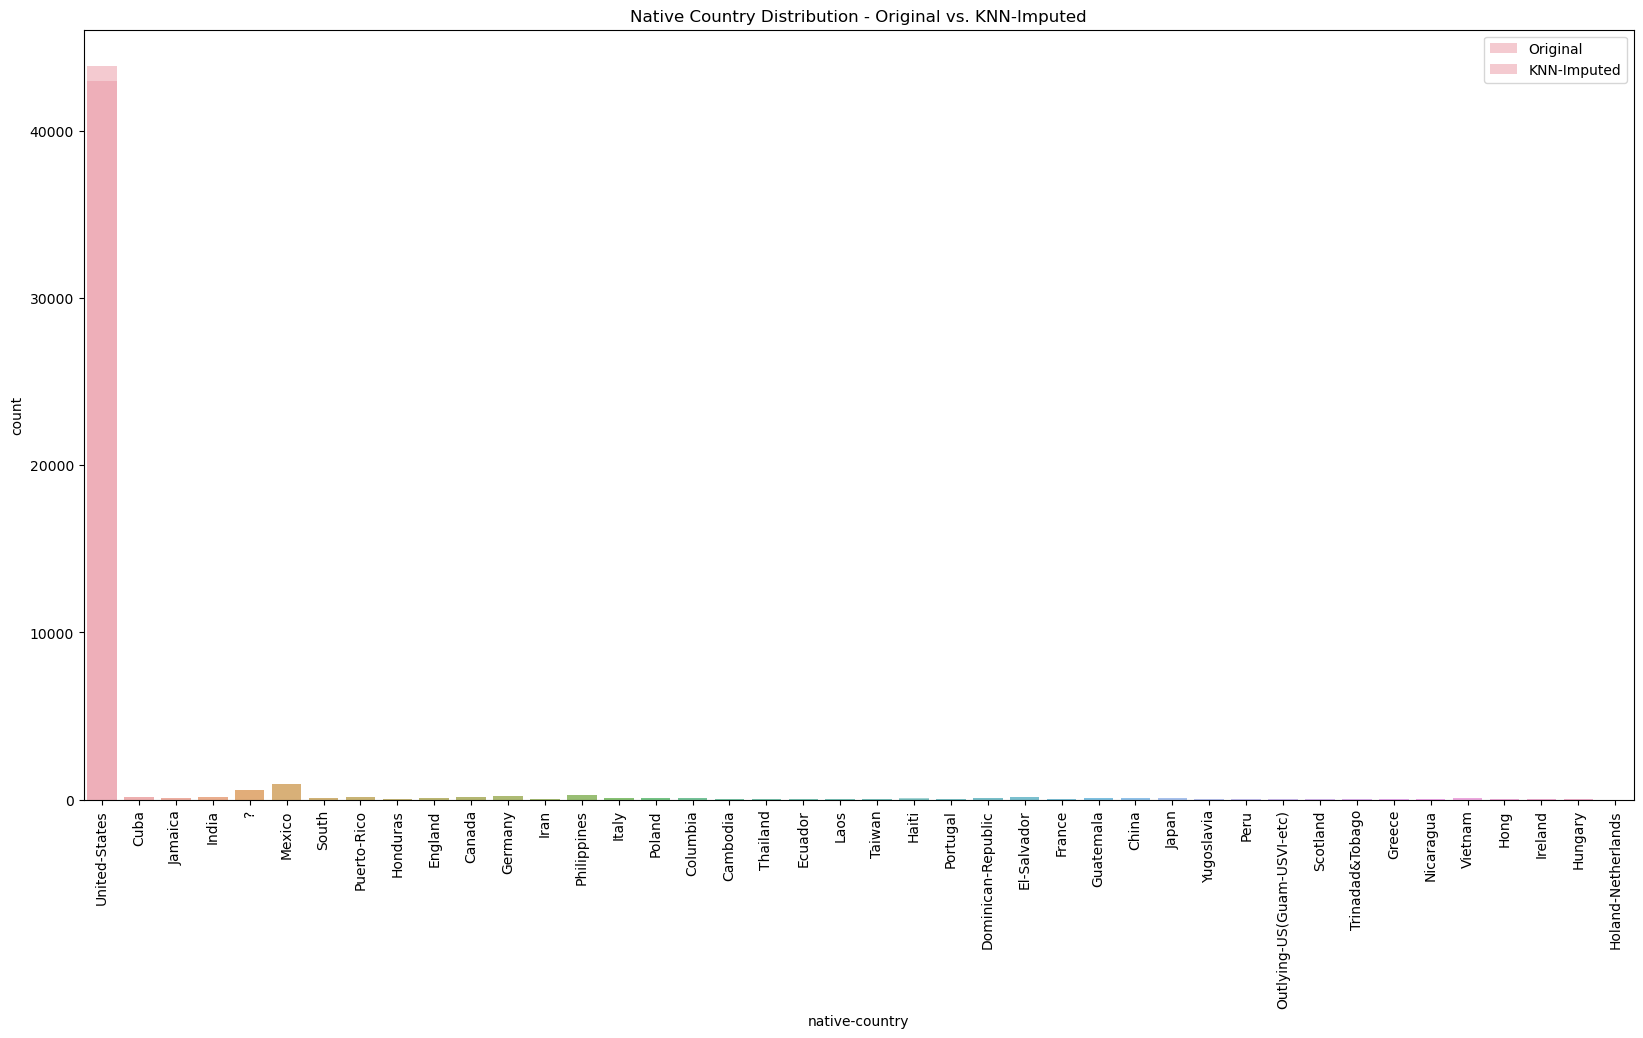

In [21]:
fig_size = (20, 10)

plt.figure(figsize=fig_size)
sns.countplot(x='workclass', data=df, alpha=0.5, label='Original')
sns.countplot(x='workclass', data=df_imputed, alpha=0.5, label='KNN-Imputed')
plt.legend()
plt.title('Workclass Distribution - Original vs. KNN-Imputed')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=fig_size)
sns.countplot(x='occupation', data=df, alpha=0.5, label='Original')
sns.countplot(x='occupation', data=df_imputed, alpha=0.5, label='KNN-Imputed')
plt.legend()
plt.title('Occupation Distribution - Original vs. KNN-Imputed')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=fig_size)
sns.countplot(x='native-country', data=df, alpha=0.5, label='Original')
sns.countplot(x='native-country', data=df_imputed, alpha=0.5, label='KNN-Imputed')
plt.legend()
plt.title('Native Country Distribution - Original vs. KNN-Imputed')
plt.xticks(rotation=90)
plt.show()

Since we have a small amount of data missing (< 2%), I felt comfort in KNN imputation. These countplot help visualize the minimal differences between the original and KNN-imputed data. Which helps back up the claim that KNN is an appropriate method for imputing the missing values.

### Scatter Plot
**Question** - How does the number of hours worked per week vary across different education levels?

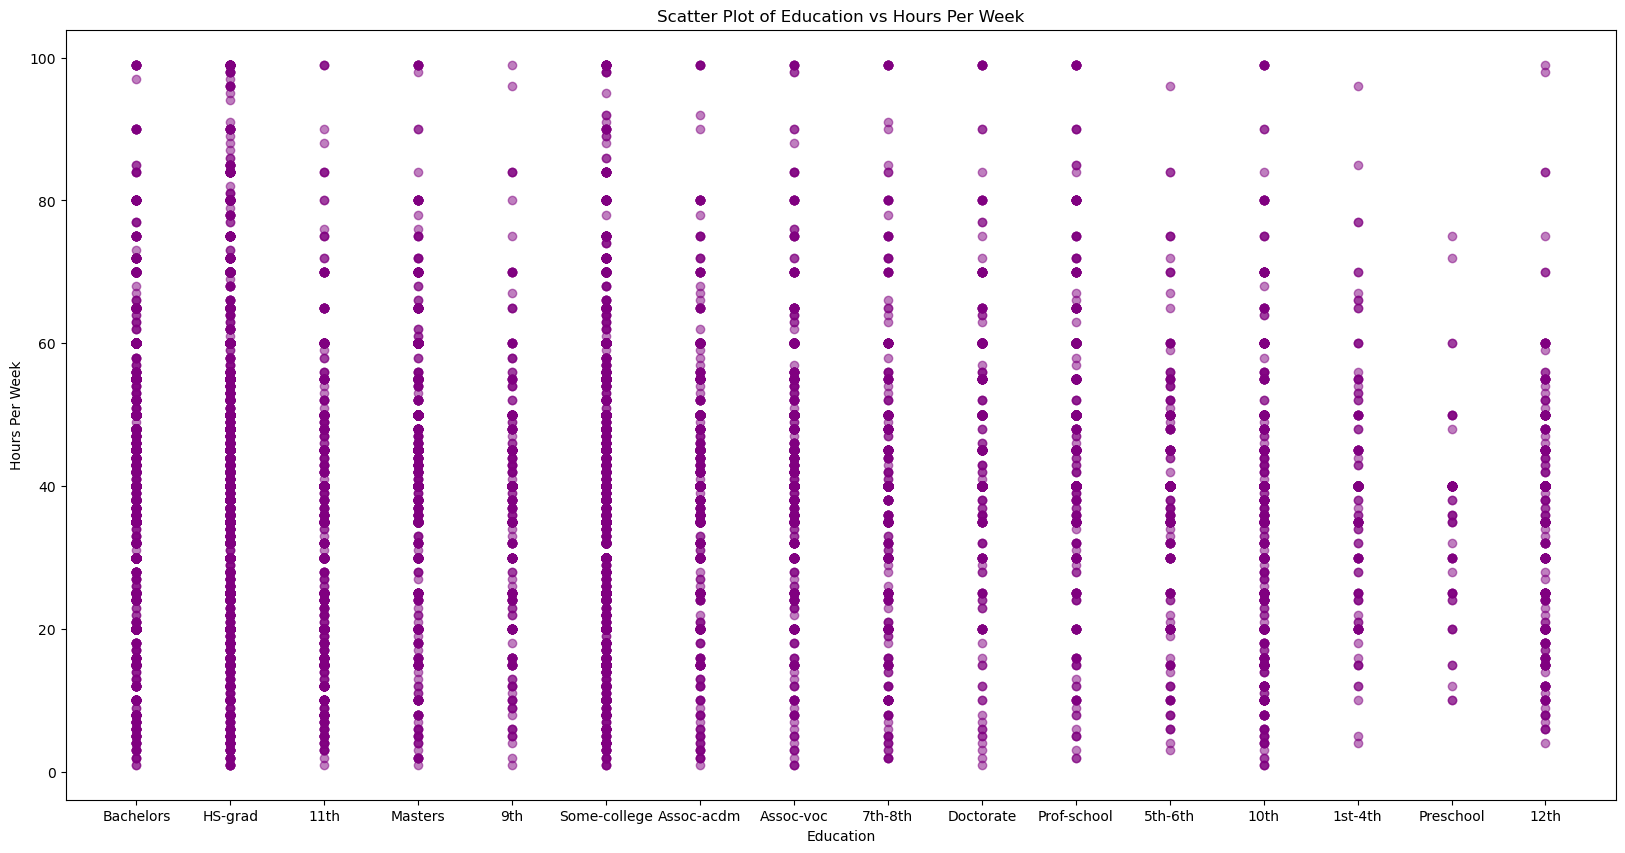

In [22]:
plt.figure(figsize=(20, 10))
plt.scatter(df_imputed['education'], df_imputed['hours-per-week'], c='purple', alpha=0.5)
plt.xlabel("Education")
plt.ylabel("Hours Per Week")
plt.title("Scatter Plot of Education vs Hours Per Week")
plt.show()

For the Scatter Plot of Education vs Hours Per Week here are my findings -

- Most people work around 40 hours per week across all education levels.
- There are outliers in each category, indicating some work much less or much more than average.
- Higher education levels like "Doctorate" show a broader range of work hours.
- Some levels, like "Preschool," have fewer data points, which may indicate less representation.
- There's no clear trend showing a direct correlation between education level and number of work hours.

**Question** - How does the number of hours worked per week correlate with age?

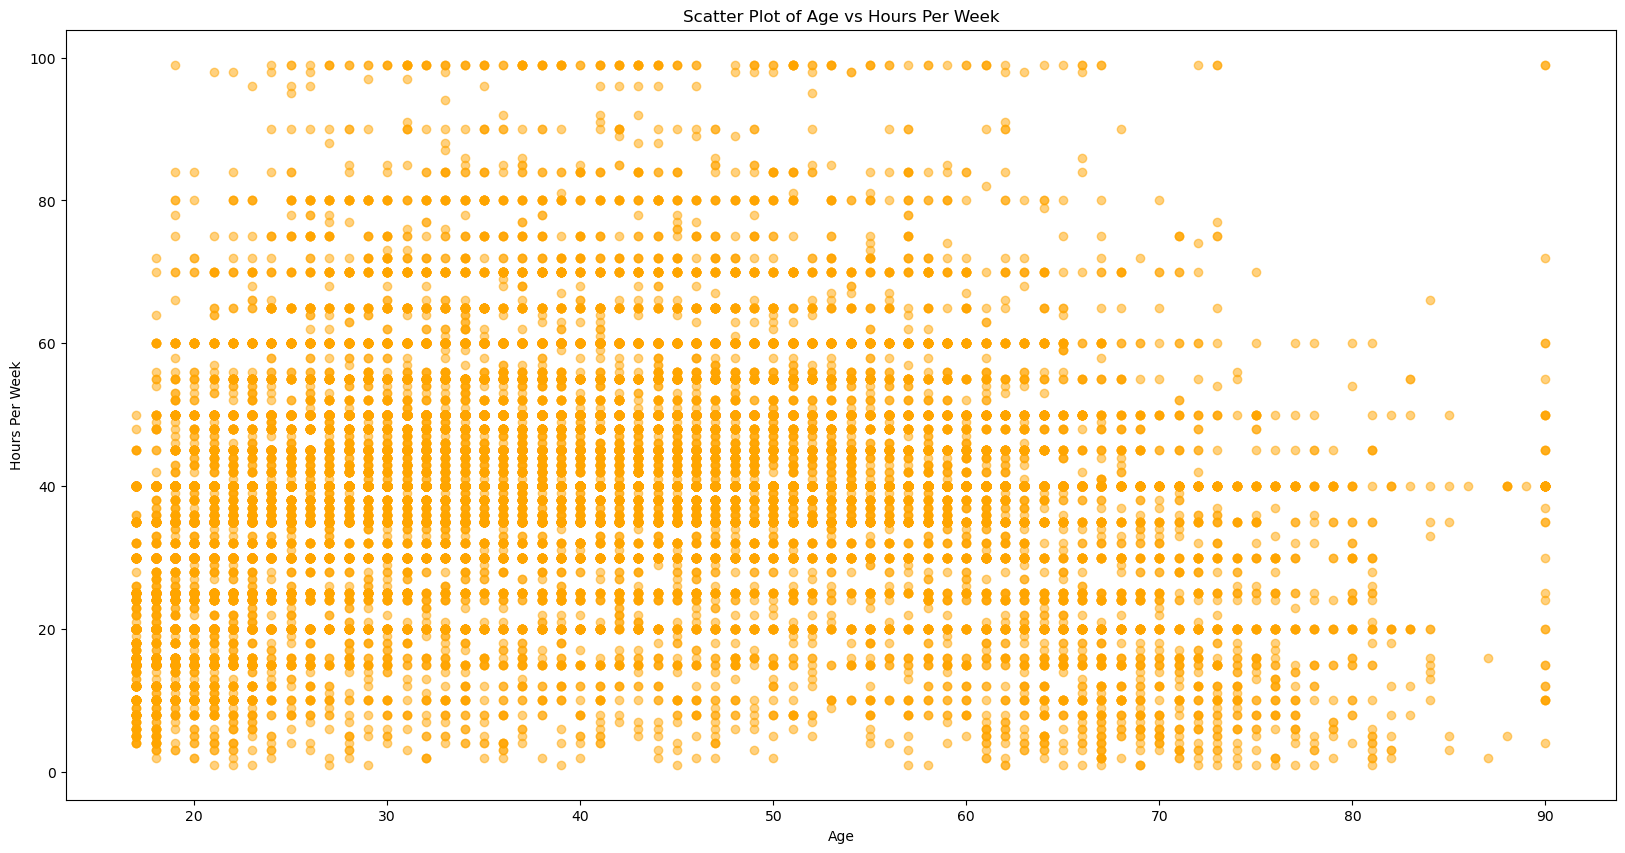

In [23]:
plt.figure(figsize=(20, 10))
plt.scatter(df_imputed['age'], df_imputed['hours-per-week'], c='orange', alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Hours Per Week")
plt.title("Scatter Plot of Age vs Hours Per Week")
plt.show()

For the Scatter Plot of Age vs Hours Per Week here are my findings -
- Most data points cluster around the standard 40-hour workweek.
- Both younger and older age groups display a wide range of work hours.
- Fewer older individuals (70+) are working, and those who do tend to work fewer hours.
- There are outliers at almost every age, with some working very long hours.

**Question** - Is there a relationship between age and income, and how strong is it?

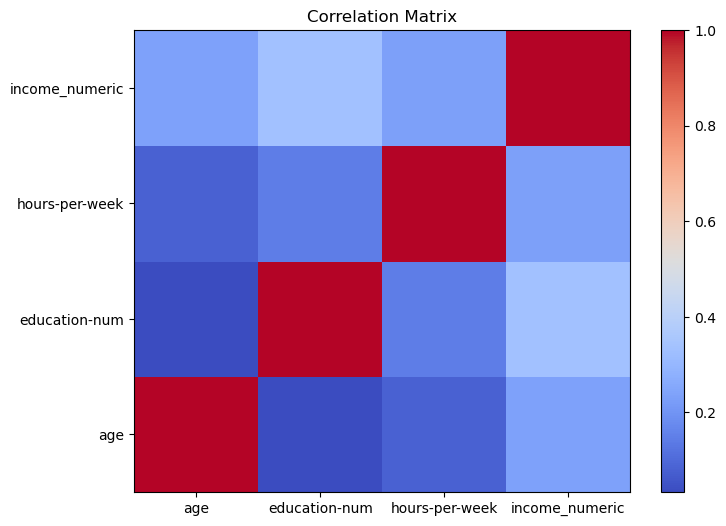

In [24]:
# Convert a binary categorical variable to numeric
df_imputed['income_numeric'] = df_imputed['income'].map({'<=50K': 0, '>50K': 1})

# Now that 'income' is numeric, you can safely compute the correlation matrix
vars_to_use = ['age', 'education-num', 'hours-per-week', 'income_numeric']

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
plt.pcolor(df_imputed[vars_to_use].corr(), cmap='coolwarm')
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

For the Correlation Matrix of  'age', 'education-num', 'hours-per-week' and 'income_numeric’, here are my findings -

- There is a slight positive correlation between age and income. This could indicate that as age increases, there's a tendency for income to increase as well. (more experience and career advancement)
- There is a strong positive correlation between education and income. This is a common finding in many studies where higher educational attainment often correlates with higher income levels.
- There seems to be a very slight positive correlation between the number of hours worked per week and income. This could hint that increased working hours might be linked to higher income, though this connection seems quite small.
- There is no significant correlation between hours worked per week and education level. This suggests that the amount of education someone has doesn't necessarily predict their amount of working hours.

### Grouped Count Plots
Used when you have multiple categorical or nominal variables that you want to show together in sub-groups. Grouping mean to display the counts of different subgroups on the dataset. For the titanic data, this can be quite telling of the dataset.

**Question** - Does age, gender, or class have an effect on survival?

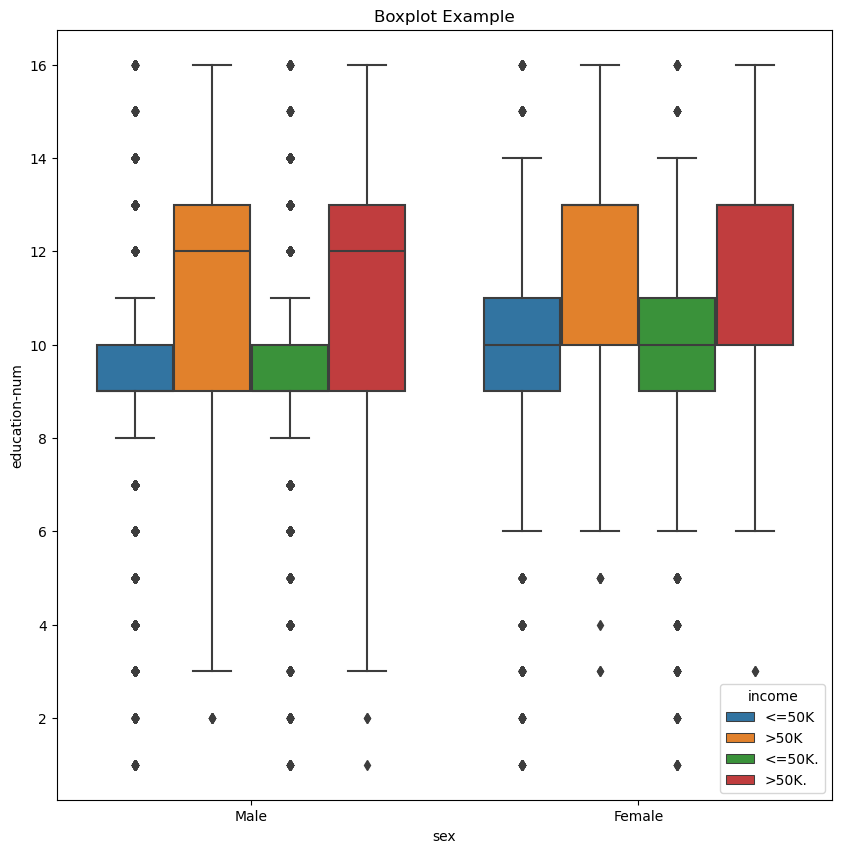

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(x="sex", y="education-num", hue="income", data=df_imputed)
plt.title('Boxplot Example')
plt.show()

For the BoxPlot of sex, education-num, and income, here are my findings -
- Higher income is associated with higher education levels for both genders.
- Both genders have a similar median education level across income brackets.
- Higher income groups have less variability in education levels.
- The education distribution is broader in the lower income bracket.

**Question** -How does the distribution of education levels within income groups compare between males and females?

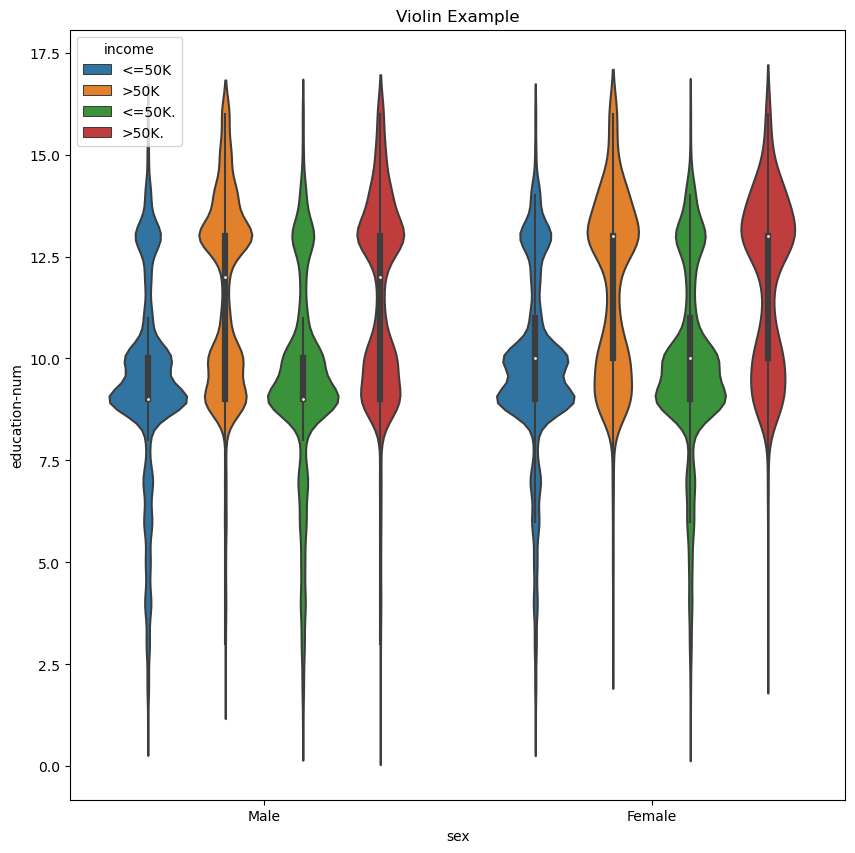

In [26]:
plt.figure(figsize=(10,10))
sns.violinplot(x="sex", y="education-num", hue="income", data=df_imputed)
plt.title('Violin Example')
plt.show()

For the ViolinPlot of sex, education-num, and income, here are my findings -
- Both males and females show a wider distribution of education in the "<=50K" income group, indicating more variability in education levels among lower earners.
- The ">50K" income group for both genders has a higher median education level and a narrower distribution. Suggesting a consistency of higher education among higher earners.
- The thickness of the violins suggests that there is a larger number of individuals in the lower education range within the "<=50K" income group.